# 1. Load modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy import optimize
import os, sys

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
from pathlib import Path
xrdpy_test_path = Path().absolute()
sys.path.insert(0, os.path.join(xrdpy_test_path, '../'))
import xrdpy

# 2. Set up the xrd-file path

In [4]:
filepath = os.path.join(xrdpy_test_path,"xrd_files")
filename = "NT3334C_RSM_w2T-2T-105AlN-AlGaN_fast.xrdml"

In [5]:
savefig = False
save_fig_path = os.path.join(xrdpy_test_path,"../imgs")

In [6]:
gen_fns = xrdpy.general_fns(print_log='low')
xrd_ = xrdpy.xrd(print_log='low')
xrd_plt = xrdpy.plottings(save_figure_dir=save_fig_path, print_log='low')

# 3. Set default variables

#### Variable source: https://www.ioffe.ru/SVA/NSM/Semicond/

In [8]:
alloy_type='ternary' 
structure_type='wz'

# Lattice parameters for AlN and GaN binaries
AlN_a, AlN_c = 3.112, 4.982
GaN_a, GaN_c = 3.189, 5.185    

# Cij parameters for AlN and GaN binaries
GaN_C13 = 106
GaN_C33 = 398
AlN_C13 = 108
AlN_C33 = 373

# Bowing parameters
bowing_a = 0.0
bowing_c = 0.0
bowing_C13 = 0.0
bowing_C33 = 0.0

# reciprocal axes are multiplited by this number to make enlarge axes
mul_fact = [10000, 10000] # along [Qx, Qy]

# a_lp_bin: [a_lattice_parameter bin_1, a_lattice_parameter bin_2, bowing]
# For ternary_wz we need followings: [a_lp_bin, c_lp_bin, c13_bin, c33_bin]
list_binary_parameters = [[AlN_a, GaN_a, bowing_a], [AlN_c, GaN_c, bowing_c],
                          [AlN_C13, GaN_C13, bowing_C13], [AlN_C33, GaN_C33, bowing_C33]]

# Reflection plane hkl
hkl = (1,0,5)

# 4. Read xrd-file

## 4.1 Real space data

In [9]:
lambda_wavelength, two_theta_values, omega_values, rsm_intesity  = \
    xrd_.xrd_read_data(xrd_file_name=os.path.join(filepath, filename))
# X-ray wave number
R = 1/lambda_wavelength

Wavelength used: 1.5405980


## 4.2 Reciprocal space conversion

In [10]:
total_two_theta_in_row = np.shape(rsm_intesity)[1]
rec_space_x, rec_space_y = xrd_.Qxy(omega=omega_values, two_theta=two_theta_values, 
                                    total_two_theta_in_row=total_two_theta_in_row,
                                    R=R, mul_fact=mul_fact)

# 5. Plottings

## 5.1 Real space map

Plotting real space map ...


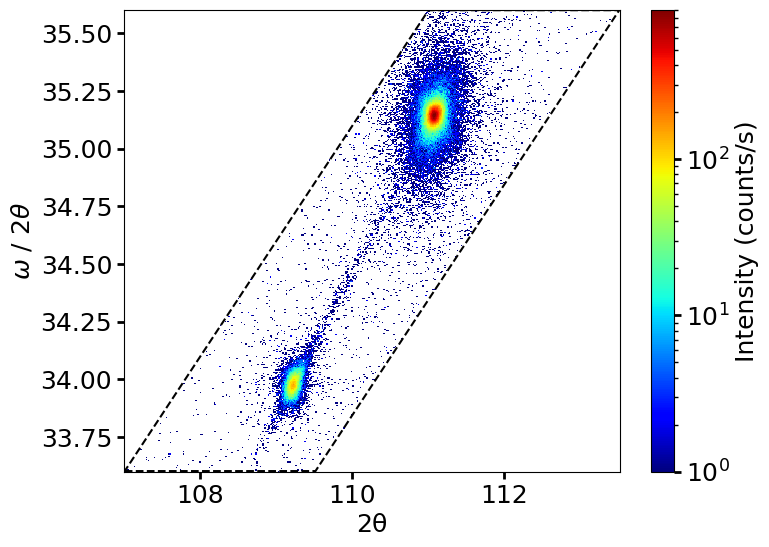

Done


In [11]:
print('Plotting real space map ...')
xlabel_text = r'2$\mathrm{\theta}$'
ylabel_text = r'$\omega$ / $2\theta$'
save_file_name = 'AlN_AlGaN_AlN_real_space.png' if savefig else None
_ = xrd_.xrd_plot(save_figure_dir=save_fig_path, save_file_name=save_file_name, 
                 mode="real_space", xaxis_label=xlabel_text,threshold_intensity=1e-5,
                 yaxis_label=ylabel_text, color_map='jet', color_scale='log', 
                 colorbar_label='Intensity (counts/s)', show_plot=True, dpi=75)
print('Done')

## 5.2 Reciprocal space map (without shift)

### 5.2.1 Reciprocal space map (single)

Plotting reciprocal space map (without any shift)...


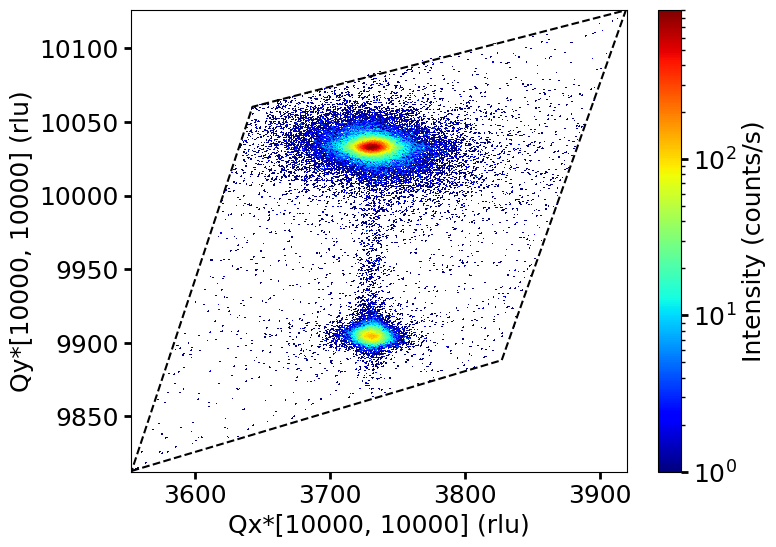

Done


In [12]:
xlabel_text = f'Qx*{mul_fact} (rlu)'
ylabel_text = f'Qy*{mul_fact} (rlu)'
print('Plotting reciprocal space map (without any shift)...')
save_file_name = 'AlN_AlGaN_AlN_reciprocal_space.png' if savefig else None
_ = xrd_plt.xrd_plot(save_file_name=save_file_name, x_values=rec_space_x, 
                     y_values=rec_space_y, z_values=rsm_intesity, Xmin=None,Xmax=None,
                     mode="reciprocal_space", xaxis_label=xlabel_text, threshold_intensity=0.1,
                     yaxis_label=ylabel_text, color_map='jet', color_scale='log',
                     colorbar_label='Intensity (counts/s)', dpi=75)
print('Done')

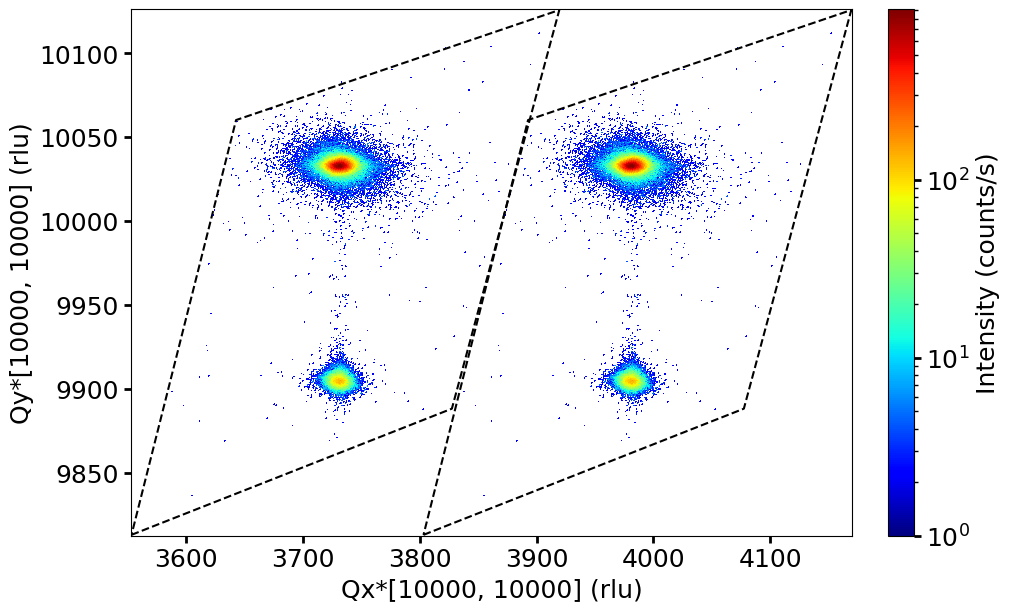

In [13]:
xlabel_text = f'Qx*{mul_fact} (rlu)'
ylabel_text = f'Qy*{mul_fact} (rlu)'

vmin, vmax = 1, max(rsm_intesity.max(), rsm_intesity.max()) # vmin can not be exatly 0.
threshold_intensity_ = 2
shift_2nd_plot = 250
#xmin, xmax = rec_space_x1.min(), rec_space_x_shift2.min()), max(rec_space_x_shift1.max(), rec_space_x_shift2.max())
#ymin, ymax = min(rec_space_y_shift1.min(), rec_space_y_shift2.min()), max(rec_space_y_shift1.max(), rec_space_y_shift2.max())

fig1, ax1 = plt.subplots(1, 1, figsize=(10,6), constrained_layout=True)

fig1, ax1, _ = xrd_plt.xrd_plot(fig=fig1, ax=ax1, save_file_name=None, x_values=rec_space_x,
                                y_values=rec_space_y, z_values=rsm_intesity,
                                mode="reciprocal_space", xaxis_label=xlabel_text, 
                                yaxis_label=ylabel_text, vmin=vmin, vmax=vmax,
                                color_map='jet', show_plot=False, threshold_intensity=threshold_intensity_,
                                color_scale='log', show_colorbar=False)
fig1, ax1, _ = xrd_plt.xrd_plot(fig=fig1, ax=ax1, threshold_intensity=threshold_intensity_,
                                save_file_name=None, x_values=rec_space_x+shift_2nd_plot,
                                y_values=rec_space_y, z_values=rsm_intesity,
                                vmin=vmin, vmax=vmax, mode="reciprocal_space", 
                                xaxis_label=xlabel_text, yaxis_label=ylabel_text, 
                                color_map='jet', color_scale='log',show_plot=False,
                                colorbar_label='Intensity (counts/s)')
